### Import Libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

## Question 1

### Load Dataset

In [2]:
data = pd.read_csv('./water_potability.csv')
print(data.shape)
data.head(5)

(3276, 10)


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [3]:
data.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


### Plot data

array([[<Axes: title={'center': 'ph'}>,
        <Axes: title={'center': 'Hardness'}>,
        <Axes: title={'center': 'Solids'}>],
       [<Axes: title={'center': 'Chloramines'}>,
        <Axes: title={'center': 'Sulfate'}>,
        <Axes: title={'center': 'Conductivity'}>],
       [<Axes: title={'center': 'Organic_carbon'}>,
        <Axes: title={'center': 'Trihalomethanes'}>,
        <Axes: title={'center': 'Turbidity'}>]], dtype=object)

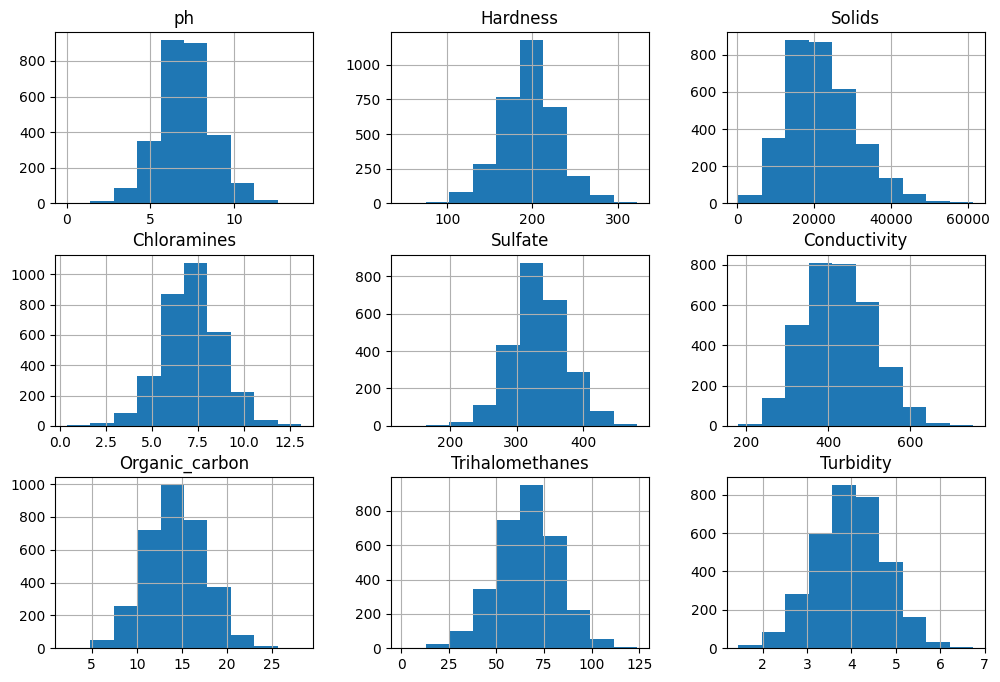

In [4]:
data.hist(data.columns[:-1], figsize=(12,8), bins=10)

Potability
0    1998
1    1278
Name: count, dtype: int64


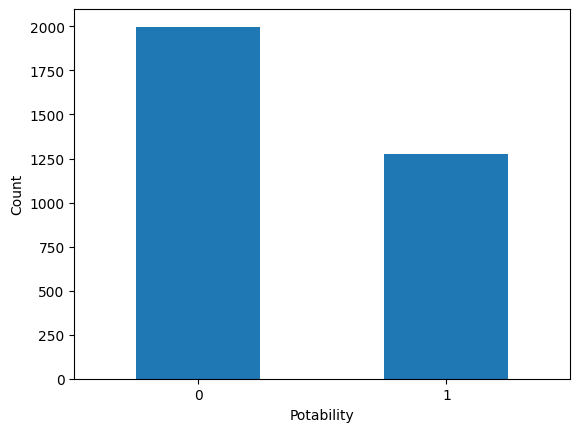

In [5]:
print(data['Potability'].value_counts())
data['Potability'].value_counts().plot(kind='bar')
plt.xticks(rotation=360)
plt.ylabel('Count')
plt.show()


In [6]:
potability_percentage = round(data['Potability'].value_counts()/data['Potability'].size*100, 2)
print(potability_percentage)

Potability
0    60.99
1    39.01
Name: count, dtype: float64


Βλέπουμε ότι έχουμε περισσότερα παραδείγματα μη-πόσιμου νερού (60.99% του συνολικού dataset). Παρόλα αυτά, επειδή ο κύριως σκοπός της εφαρμογής μας είναι η ανίχνευση του μη-πόσιμου νερού, επειδή είναι πιο σοβαρό, δεν μας πειράζει τόσο πολύ που το μοντέλο μας να εκπαιδευτεί να εντοπίζει καλύτερα αυτή την ομάδα των δεδομένων.

### Count NULL values

In [7]:
nullValues = data.isnull().sum()
print(f"Number of NULL values for each feature\n{'-'*40}")
print(nullValues)

Number of NULL values for each feature
----------------------------------------
ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64


Τα δεδομένα μας είναι αρκετά ποιοτικά γιατί ακολουθούν μια Κανονική Κατανομή, όπου τα περισσότερα δεδομένα είναι συγκεντρωμένα στη διάμεσες τιμές (κέντρο) και απλώνονται ομοιόμορφα δεξιά και αριστερά αυτών των τιμών. Ακόμα και για την στήλη 'Sulfate' όπου έχουμε αρκετές NULL τιμές, αυτές που έχουμε ακολουθούν την κανονική κατανομή. 
Επίσης πολύ σημαντικό είναι ότι δεν έχουμε σοβαρές outliers τιμές, εκτός κάποιων τιμών στη στήλη (Solids).

##  Question 2

!ΣΗΜΕΙΩΣΗ: Αναγκαστικά θα πάρουμε υπόψιν μόνος τις παρατηρήσεις όπου έχουμε τιμές για ph (2785), διότι όπως είδαμε και παραπάνω έχουμε και 491 παρατηρήσεις με NULL τιμή στο ph.

Potability
0    612
1    356
Name: count, dtype: int64
Potability
0    745
1    583
Name: count, dtype: int64
Potability
0    327
1    162
Name: count, dtype: int64


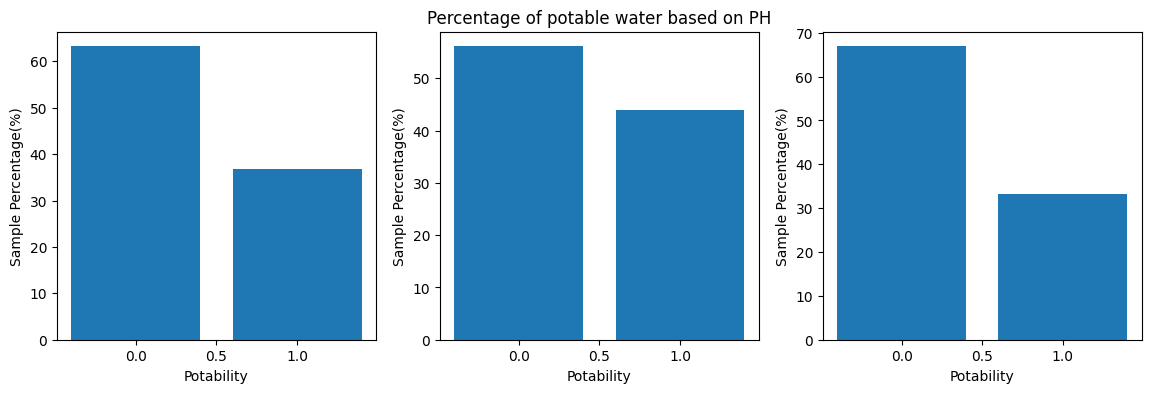

In [9]:
masku6_5 = data.iloc[:, 0] < 6.5
maskbet = (data.iloc[:, 0] >= 6.5) & (data.iloc[:,0] <= 8.5)
maska8_5 = data.iloc[:, 0] > 8.5

phu6_5 = data[masku6_5] 
phbet = data[maskbet]
pha8_5 = data[maska8_5]
print(phu6_5['Potability'].value_counts())
print(phbet['Potability'].value_counts())
print(pha8_5['Potability'].value_counts())

fig, ax = plt.subplots(1, 3, figsize=(14, 4))
ax[0].bar(phu6_5['Potability'].unique(), (phu6_5['Potability'].value_counts()/phu6_5['Potability'].size)*100)
ax[0].set_ylabel('Sample Percentage(%)')
ax[0].set_xlabel('Potability')

ax[1].bar(phbet['Potability'].unique(), (phbet['Potability'].value_counts()/phbet['Potability'].size)*100)
ax[1].set_ylabel('Sample Percentage(%)')
ax[1].set_xlabel('Potability')
ax[1].set_title('Percentage of potable water based on PH')

ax[2].bar(pha8_5['Potability'].unique(), (pha8_5['Potability'].value_counts()/pha8_5['Potability'].size)*100)
ax[2].set_ylabel('Sample Percentage(%)')
ax[2].set_xlabel('Potability')

plt.show()

Εκ πρώτης όψεως βλέπουμε ότι ο κανόνας του Παγκόσμιου Οργανισμού Υγείας δεν επαληθεύεται πλήρως διότι ακόμα και για `6.5≤pH≤8.5` έχουμε μεγαλύτερα ποσοστά μη-πόσιμων παρατηρήσεων. Παρόλα αυτά, λαμβάνοντας υπόψιν ότι και οι παρατηρήσεις του μη-πόσιμου νερού είναι αρκετά περισσότερες στο διάστημα `6.5≤pH≤8.5`, μειώνεται αρκετά η διαφορά μεταξύ των πόσιμων και μη-πόσιμων παρατηρήσεων, σε σχέση με τα άλλα 2 διαστήματα όπου είναι ξεκάθαρη η διαφορά. Τέλος, παρατηρώντας μόνο τα παραδείγματα του πόσιμου νερού, βλέπουμε ότι είναι πολλά περισσότερα αυτά που βρίσκονται στο διάστημα `6.5≤pH≤8.5` σε σχέση με τα υπόλοιπα, 583 προς 162 για `ph>8.5` και 356 για `ph<6.5`. 

## Question 3

Text(0.5, 0, 'pH')

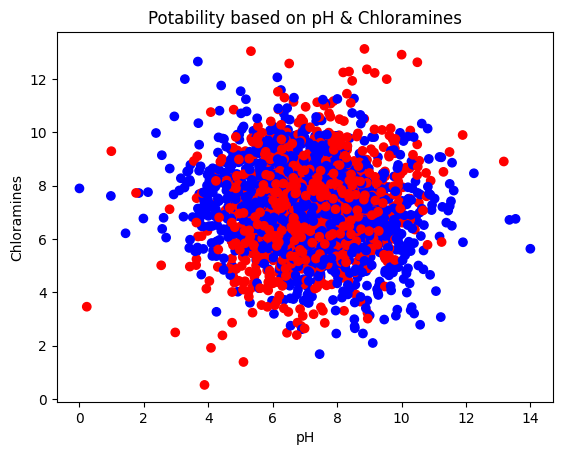

In [10]:
plt.scatter(data['ph'], data['Chloramines'], c=data['Potability'], cmap='bwr')
plt.title('Potability based on pH & Chloramines')
plt.ylabel('Chloramines')
plt.xlabel('pH')

Παρατηρούμε ότι τα δεδομένα μας δεν είναι γραμμικά διαχωρίσιμα, ως προς τα 2 αυτά χαρακτηριστικά.

## Question 4

Όπως είδαμε παραπάνω, μόνο 3 στήλες έχουν ελλειπείς στοιχεία οπότε θα πάμε να τις γεμίσουμε με τη μέση τιμή της κάθε στήλης.

In [11]:
data['ph'] = data['ph'].fillna(data['ph'].mean())
data['Sulfate'] = data['Sulfate'].fillna(data['Sulfate'].mean())
data['Trihalomethanes'] = data['Trihalomethanes'].fillna(data['ph'].mean())

nullValues = data.isnull().sum()
print(nullValues)

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64


## Question 5

In [12]:
x = np.array(data.drop(columns=['Potability']))
y = np.array(data['Potability'])

x.shape,y.shape

((3276, 9), (3276,))

In [13]:
test_size=0.30
seed=0

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=seed)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((2293, 9), (983, 9), (2293,), (983,))

## Question 6

In [14]:
tree = DecisionTreeClassifier()

In [15]:
tree.fit(x_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [16]:
ypred_train = tree.predict(x_train)
train_accuracy = accuracy_score(y_train, ypred_train)
train_accuracy = round(train_accuracy*100, 2)

print(f"Decision Tree's accuraccy in training set is: {train_accuracy}")

Decision Tree's accuraccy in training set is: 100.0


In [17]:
ypred_test = tree.predict(x_test)
test_accuracy = accuracy_score(y_test, ypred_test)
test_accuracy = round(test_accuracy*100, 2)

print(f"Decision Tree's accuraccy in test set is: {test_accuracy}")

Decision Tree's accuraccy in test set is: 60.12


## Question 7

In [23]:
results = pd.DataFrame(columns=['criterion','max_depth','min_samples_split',
                                'min_samples_leaf','max_features','cost_complexity_pruning',
                                'train_accuracy','test_accuracy']
                        )

In [597]:
criterion='entropy'
max_depth=5
min_samples_split=5
min_samples_leaf=2
max_features='sqrt'
cost_complexity_pruning=0.01
tree2 = DecisionTreeClassifier(criterion=criterion, 
                               max_depth=max_depth, 
                               min_samples_split=min_samples_split, 
                               min_samples_leaf=min_samples_leaf, 
                               max_features=max_features, 
                               ccp_alpha=cost_complexity_pruning
                            )

In [598]:
tree2.fit(x_train, y_train)

,criterion,'entropy'
,splitter,'best'
,max_depth,5
,min_samples_split,5
,min_samples_leaf,2
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [599]:
ypred_train2 = tree2.predict(x_train)
train_accuracy2 = accuracy_score(y_train, ypred_train2)
train_accuracy2 = round(train_accuracy2*100, 2)

print(f"Decision Tree's accuraccy in training set is: {train_accuracy2}")

Decision Tree's accuraccy in training set is: 60.53


In [600]:
ypred_test2 = tree2.predict(x_test)
test_accuracy2 = accuracy_score(y_test, ypred_test2)
test_accuracy2 = round(test_accuracy2*100, 2)

print(f"Decision Tree's accuraccy in test set is: {test_accuracy2}")

Decision Tree's accuraccy in test set is: 62.05


In [601]:
results.loc[len(results)] = [criterion,max_depth,min_samples_split,
                             min_samples_leaf,max_features,cost_complexity_pruning,
                             train_accuracy2,test_accuracy2]

In [602]:
results

,criterion,max_depth,min_samples_split,min_samples_leaf,max_features,cost_complexity_pruning,train_accuracy,test_accuracy
0,gini,None,2,1,None,0.00,100.00,58.49
1,gini,None,2,1,None,0.01,60.53,62.05
2,gini,None,2,1,sqrt,0.00,100.00,58.80
3,gini,None,2,1,sqrt,0.01,60.53,62.05
4,gini,None,2,2,None,0.00,94.85,59.61
...,...,...,...,...,...,...,...,...
91,entropy,5,5,1,sqrt,0.01,60.53,62.05
92,entropy,5,5,2,None,0.00,67.12,65.62
93,entropy,5,5,2,None,0.01,62.01,62.67
94,entropy,5,5,2,sqrt,0.00,63.85,62.97


### Save DataFrame to CSV
Αποθηκεύω το πινακάκι σε CSV ώστε να μην ξαναχρειαστεί να τρέχω όλους τους συνδυασμούς ξάνα απτήν αρχή, εάν χρειαστεί.

In [603]:
results.to_csv('./decision_tree_comb_scores.csv')

## Question 8

In [604]:
print(results.loc[results.where(results['max_depth']==3)['test_accuracy'].idxmax()])

criterion                  entropy
max_depth                        3
min_samples_split                5
min_samples_leaf                 2
max_features                  None
cost_complexity_pruning        0.0
train_accuracy               64.11
test_accuracy                63.99
Name: 76, dtype: object


In [ ]:
final_tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_split=5, 
                                    min_samples_leaf=2, max_features=None, ccp_alpha=0.0)

In [606]:
final_tree.fit(x_train, y_train)

,criterion,'entropy'
,splitter,'best'
,max_depth,3
,min_samples_split,5
,min_samples_leaf,2
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


[Text(0.5, 0.875, 'x[4] <= 259.026\nentropy = 0.968\nsamples = 2293\nvalue = [1388, 905]'),
 Text(0.25, 0.625, 'x[2] <= 21161.408\nentropy = 0.771\nsamples = 62\nvalue = [14, 48]'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'x[8] <= 4.604\nentropy = 0.982\nsamples = 19\nvalue = [11, 8]'),
 Text(0.0625, 0.125, 'entropy = 0.837\nsamples = 15\nvalue = [11, 4]'),
 Text(0.1875, 0.125, 'entropy = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.375, 0.375, 'x[1] <= 220.901\nentropy = 0.365\nsamples = 43\nvalue = [3, 40]'),
 Text(0.3125, 0.125, 'entropy = 0.0\nsamples = 27\nvalue = [0, 27]'),
 Text(0.4375, 0.125, 'entropy = 0.696\nsamples = 16\nvalue = [3, 13]'),
 Text(0.75, 0.625, 'x[4] <= 387.328\nentropy = 0.961\nsamples = 2231\nvalue = [1374, 857]'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'x[0] <= 4.636\nentropy = 0.952\nsamples = 2068\nvalue = [1300, 768]'),
 Text(0.5625, 0.125, 'entropy = 0.71\nsamples = 98\nvalue = [79, 19]'),
 Text(0.6875, 0.125, 'entropy = 0.958\nsampl

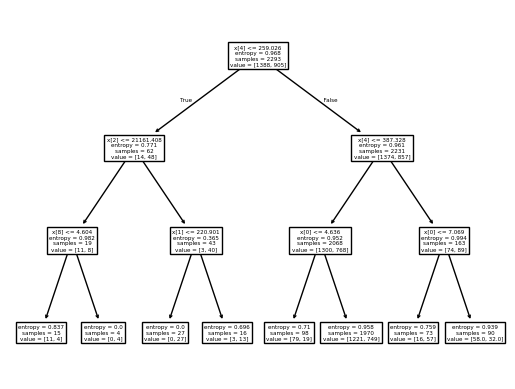

In [607]:
plot_tree(final_tree)

### Συμπεράσματα
Από το γράφο του Δένδρου Απόφασης, βλέπουμε ότι για παράδειγμα στο 1ο κόμβο:
- To χ[4]<=259.026, σημαίνει ότι οι παρατηρήσεις που έχουν τιμή `<=259.026` για το 4ο feature (δηλαδή το Sulfate), παίρνουν το αριστερό μονοπάτι `True` του γράφου ενώ για `>259.026` το δεξί αντίστοιχα.
- Το entropy=0.965, μας δείχνει την εντροπία των δεδομένων που βρίσκονται σε αυτόν τον κόμβο. Επειδή είναι ο αρχικός, είναι η εντροπία για όλα τα δεδομένα. Το `0.965` μας δείχνει μεγαλή εντροπία στα δεδομένα μας, διότι είναι πολύ κοντά στο `1` που είναι η μέγιστη.
- Το samples = 2293, μας δείχνει πόσα στοιχεία βρίσκονται/φτάσανε σε αυτό το κόμβο.
- Το value = [1388, 905], μας δείχνει πόσα από τα στοιχεία που βρίσκονται σε αυτό το κόμβο ανήκουν στη κλάση 0='Non Potable' δηλαδή 1388, και πόσα στην κλάση 1='Potable' 905.

Η ίδια λογική ακολουθείται και από τους υπόλοιπους κόμβους μέχρι να φτάσουμε στα τελικά φύλλα.

## Question 9-10

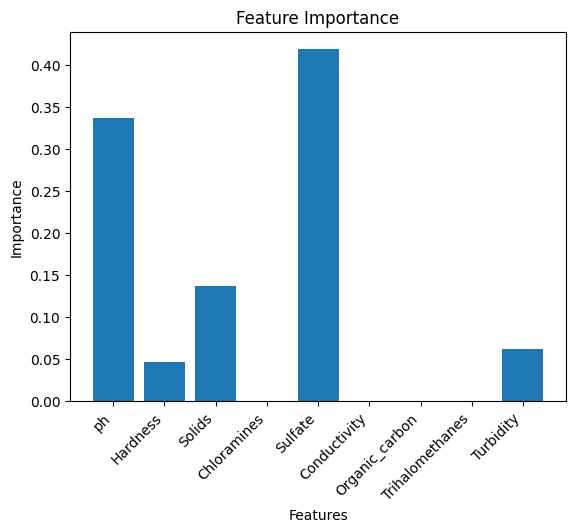

In [615]:
importance = final_tree.feature_importances_

plt.bar([data.columns[i] for i in range(len(importance))], importance)
plt.xticks(rotation=45, ha='right')
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

Όπως φαίνεται από το ραβδόγραμμα, τα 5 πιο σημαντικά χαρακτηριστικά είναι κατά σειρά:
1) Sulfate
2) pH
3) Solids
4) Turbidity
5) Hardness

## Question 11

Είναι πιο πιθανό να παρατηρήσουμε καλύτερα ποσοστά ευστοχίας στο Random Forest μοντέλο μας, δεδομένου ότι δεν βασιζόμαστε στην απόφαση ενός μεμονομένου Δένδρου Απόφασης αλλά στο αποτέλεσμα από ένα μεγάλο υποσύνολο Δένδρων Απόφασης. 
Επίσης η αρχιτεκτονική του Random Forest μοντέλου το κάνει λιγότερο biased και λιγότερο πιθανό να υπάρξει overfitting στα δεδομένα μας, όπως παρατηρήσαμε σε κάποιους από τους παραπάνω συνδυασμούς για το Δένδρο Απόφασης όπου είχαμε 100% επιτυχία στα training δεδομένα αλλά αρκετά χαμηλό ποσοστό στα test δεδομένα μας.

## Question 12

In [628]:
seed=0
estimators=200
randomForest = RandomForestClassifier(criterion='entropy', max_depth=3, min_samples_split=5, 
                                    min_samples_leaf=2, max_features=None, ccp_alpha=0.0, 
                                    n_estimators=estimators, random_state=seed)

In [629]:
randomForest.fit(x_train, y_train)

,n_estimators,200
,criterion,'entropy'
,max_depth,3
,min_samples_split,5
,min_samples_leaf,2
,min_weight_fraction_leaf,0.0
,max_features,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [630]:
forest_trainpred = randomForest.predict(x_train)
forest_trainaccuracy = accuracy_score(y_train, forest_trainpred)
forest_trainaccuracy = round(forest_trainaccuracy*100, 2)
print(f'The accuracy of Random Forest model in test set is: {forest_trainaccuracy}')

The accuracy of Random Forest model in test set is: 66.07


In [631]:
forest_testpred = randomForest.predict(x_test)
forest_testaccuracy = accuracy_score(y_test, forest_testpred)
forest_testaccuracy = round(forest_testaccuracy*100, 2)
print(f'The accuracy of Random Forest model in test set is: {forest_testaccuracy}')

The accuracy of Random Forest model in test set is: 65.21


## Question 13
Δεδομένου ότι το μη-πόσιμο νερό αποτελεί κίνδυνο για την υγεία ενός ανθρώπου είναι πιο σημαντικό να μπορούμε να το προβλέπουμε με ακρίβεια, και ας χάνουμε σε απόδοση στην ανίχνευση πόσιμου νερού.

## Question 14
Παρόλο που η τεχνολογία του τυχαίου δάσους μπορεί να έχει καλύτερη απόδοση από ένα δέντρο απόφασης, είναι πιο ασφαλές νομικά για την εταιρεία να χρησιμοποιήσει το δέντρο απόφασης διότι μπορεί να εξηγήσει οποιαδήποτε απόφαση παρθεί από το μοντέλο. Αντιθέτως, σε ένα μοντέλο τυχαίου δάσους αυτή η επεξηγησιμότητα χάνεται, και σε κάποιο σοβαρό λάθος η εταιρεία δεν θα μπορεί να εξηγήση το λόγο που πάρθηκε η συγκεκριμένη λάθος απόφαση.